# Note
This notebook will not produce meaningful outputs with the newest catalog versions, as I deleted the NGC 4449 clusters. To run this again, comment out the lines from `derived_properties.py` that remove clusters from NGC 4449.

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
from astropy import table
from matplotlib import colors, cm
import betterplotlib as bpl

bpl.set_style()

In [2]:
data_home = Path("../data/")

def load_final_cat(galaxy_name):
    size_dir = data_home / galaxy_name / "size"
    cat_name = "final_catalog_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
    return table.Table.read(size_dir / cat_name, format="ascii.ecsv")

In [3]:
catalogs = dict()
for galaxy_dir in data_home.iterdir():
    galaxy_name = galaxy_dir.name
    this_cat = load_final_cat(galaxy_name)
    this_cat["from_human"] = ~this_cat["from_ml"]
    catalogs[galaxy_name] = this_cat

In [4]:
ngc4449 = catalogs["ngc4449"]
ngc5194 = catalogs["ngc5194-ngc5195-mosaic"]
ngc1566 = catalogs["ngc1566"]

## Then test by looking at classification status

In [5]:
print(np.unique(ngc4449["class_whitmore"][ngc4449["from_ml"]].data))
print(np.unique(ngc4449["class_whitmore"][ngc4449["from_human"]].data))
print(np.unique(ngc4449["class_ml"][ngc4449["from_ml"]].data))
print(np.unique(ngc4449["class_ml"][ngc4449["from_human"]].data))

[5]
[1 2]
[1 2]
[0 1 2 3 4]


In [6]:
print(np.unique(ngc5194["class_mode_human"][ngc5194["from_ml"]].data))
print(np.unique(ngc5194["class_mode_human"][ngc5194["from_human"]].data))
print(np.unique(ngc5194["class_ml"][ngc5194["from_ml"]].data))
print(np.unique(ngc5194["class_ml"][ngc5194["from_human"]].data))

[0.]
[1. 2.]
[1. 2.]
[1. 2. 4.]


# Galaxy-by-Galaxy Scatterplots

These may be more informative

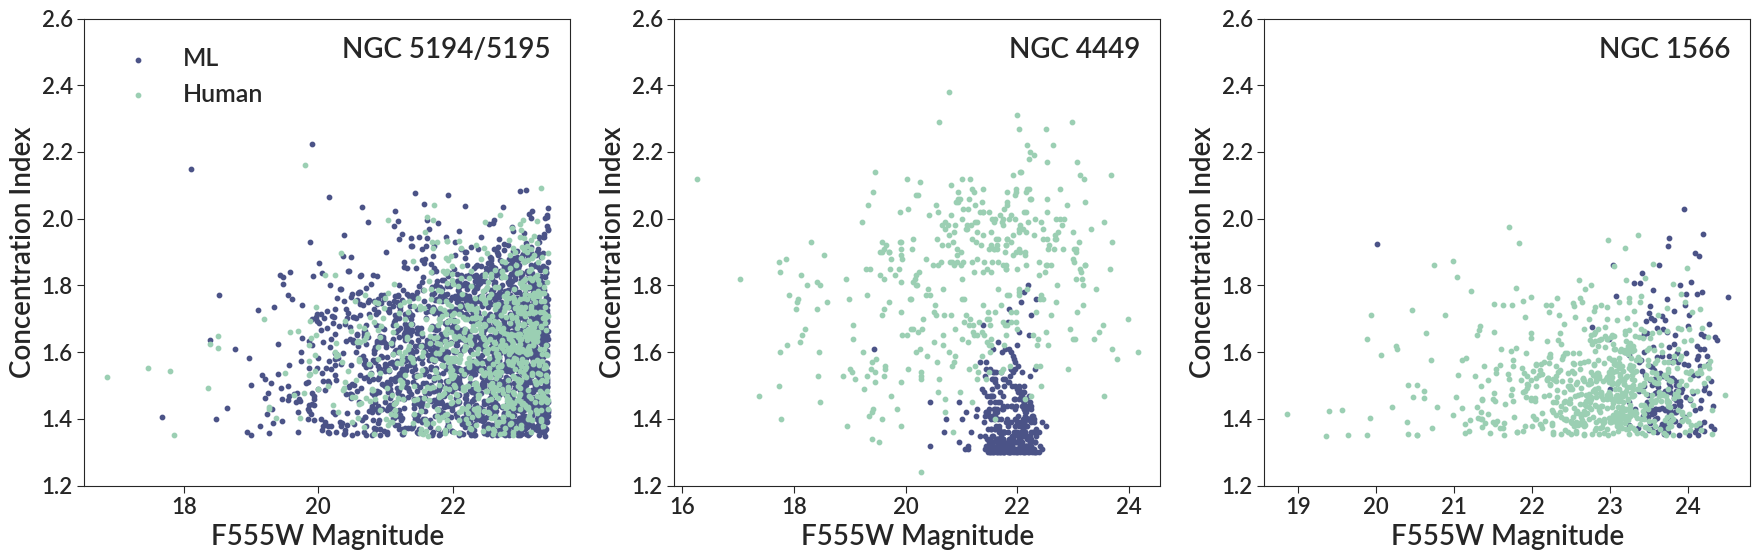

In [7]:
fig, axs = bpl.subplots(ncols=3, figsize=[18, 6])

axs[0].scatter(ngc5194["mag_F555W"][ngc5194["from_ml"]], ngc5194["CI"][ngc5194["from_ml"]], 
           label="ML", alpha=1, s=10)
axs[0].scatter(ngc5194["mag_F555W"][ngc5194["from_human"]], ngc5194["CI"][ngc5194["from_human"]], 
           label="Human", alpha=1, s=10)

axs[1].scatter(ngc4449["mag_F555W"][ngc4449["from_ml"]], ngc4449["CI"][ngc4449["from_ml"]], 
           label="ML", alpha=1, s=10)
axs[1].scatter(ngc4449["mag_F555W"][ngc4449["from_human"]], ngc4449["CI"][ngc4449["from_human"]], 
           label="Human", alpha=1, s=10)

axs[2].scatter(ngc1566["mag_F555W"][ngc1566["from_ml"]], ngc1566["CI"][ngc1566["from_ml"]], 
           label="ML", alpha=1, s=10)
axs[2].scatter(ngc1566["mag_F555W"][ngc1566["from_human"]], ngc1566["CI"][ngc1566["from_human"]], 
           label="Human", alpha=1, s=10)

axs[0].easy_add_text("NGC 5194/5195", "upper right")
axs[1].easy_add_text("NGC 4449", "upper right")
axs[2].easy_add_text("NGC 1566", "upper right")

axs[0].legend(loc=2)

for ax in axs:
    ax.add_labels("F555W Magnitude", "Concentration Index")
    ax.set_limits(y_min=1.2, y_max=2.6)
    
fig.savefig("ml_vs_human_properties.png")

# Effective Radius

In [8]:
for cat in catalogs.values():
    cat["r_eff_min"] = cat["r_eff_pc_rmax_15pix_best"] - cat["r_eff_pc_rmax_15pix_e-"]
    cat["r_eff_max"] = cat["r_eff_pc_rmax_15pix_best"] + cat["r_eff_pc_rmax_15pix_e+"]

In [9]:
def error_hist(x_min, x_max):
    xs = np.logspace(-2, 2, 1000)
    ys = []
    for x in xs:
        x_above = x > x_min
        x_below = x < x_max
        x_good = np.logical_and(x_above, x_below)
        ys.append(np.sum(x_good))

    # # normalize the y value
    ys = np.array(ys)
    # ys = ys / np.sum(ys)
    return xs, ys

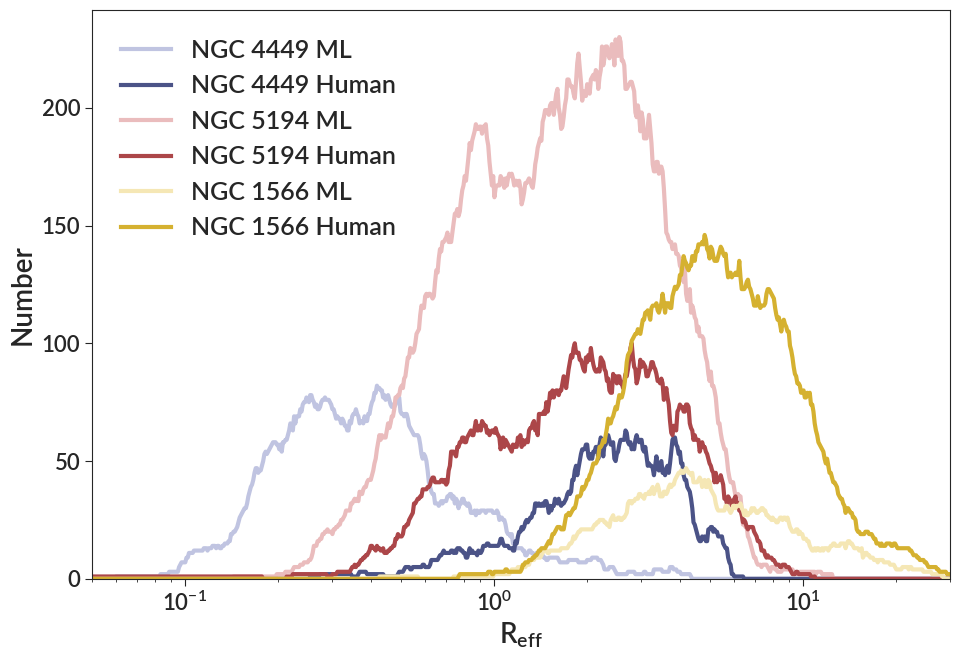

In [10]:
fig, ax = bpl.subplots()

ax.plot(*error_hist(ngc4449["r_eff_min"][ngc4449["from_ml"]], 
                    ngc4449["r_eff_max"][ngc4449["from_ml"]]), 
        label="NGC 4449 ML", c=bpl.fade_color(bpl.color_cycle[0]))
ax.plot(*error_hist(ngc4449["r_eff_min"][ngc4449["from_human"]], 
                    ngc4449["r_eff_max"][ngc4449["from_human"]]), 
        label="NGC 4449 Human", c=bpl.color_cycle[0])
ax.plot(*error_hist(ngc5194["r_eff_min"][ngc5194["from_ml"]], 
                    ngc5194["r_eff_max"][ngc5194["from_ml"]]), 
        label="NGC 5194 ML", c=bpl.fade_color(bpl.color_cycle[3]))
ax.plot(*error_hist(ngc5194["r_eff_min"][ngc5194["from_human"]], 
                    ngc5194["r_eff_max"][ngc5194["from_human"]]), 
        label="NGC 5194 Human", c=bpl.color_cycle[3])
ax.plot(*error_hist(ngc1566["r_eff_min"][ngc1566["from_ml"]], 
                    ngc1566["r_eff_max"][ngc1566["from_ml"]]), 
        label="NGC 1566 ML", c=bpl.fade_color(bpl.color_cycle[4]))
ax.plot(*error_hist(ngc1566["r_eff_min"][ngc1566["from_human"]], 
                    ngc1566["r_eff_max"][ngc1566["from_human"]]), 
        label="NGC 1566 Human", c=bpl.color_cycle[4])



ax.set_xscale("log")
ax.set_limits(0.05, 30, 0)
ax.legend(loc=2, frameon=False)
ax.add_labels("$R_{eff}$", "Number")

# Plot mass-size relation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

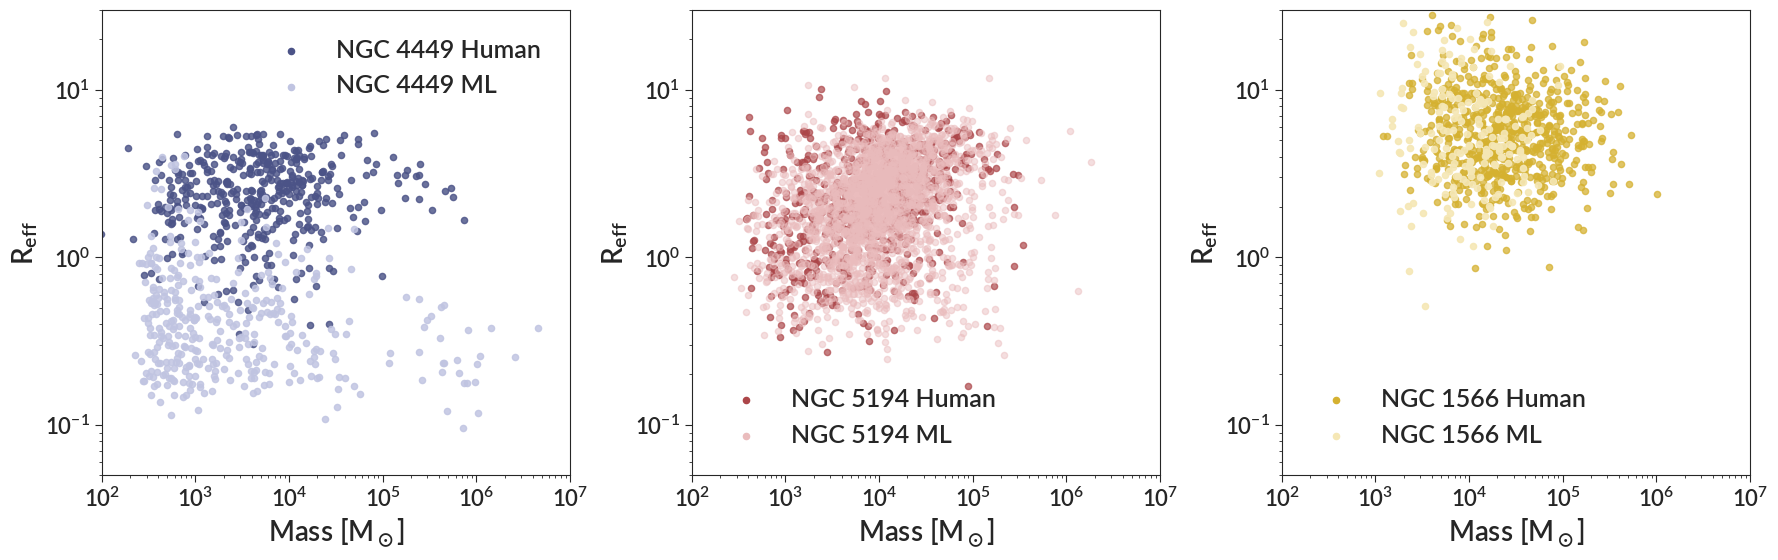

In [11]:
fig, axs = bpl.subplots(ncols=3, figsize=[18, 6])

axs[0].scatter(ngc4449["mass_msun"][ngc4449["from_human"]], 
           ngc4449["r_eff_pc_rmax_15pix_best"][ngc4449["from_human"]],
           s=20, label="NGC 4449 Human", c=bpl.color_cycle[0])
axs[0].scatter(ngc4449["mass_msun"][ngc4449["from_ml"]], 
           ngc4449["r_eff_pc_rmax_15pix_best"][ngc4449["from_ml"]],
           s=20, label="NGC 4449 ML", c=bpl.fade_color(bpl.color_cycle[0]))


axs[1].scatter(ngc5194["mass_msun"][ngc5194["from_human"]], 
           ngc5194["r_eff_pc_rmax_15pix_best"][ngc5194["from_human"]],
           s=20, label="NGC 5194 Human", c=bpl.color_cycle[3])
axs[1].scatter(ngc5194["mass_msun"][ngc5194["from_ml"]], 
           ngc5194["r_eff_pc_rmax_15pix_best"][ngc5194["from_ml"]],
           s=20, label="NGC 5194 ML", c=bpl.fade_color(bpl.color_cycle[3]))


axs[2].scatter(ngc1566["mass_msun"][ngc1566["from_human"]], 
           ngc1566["r_eff_pc_rmax_15pix_best"][ngc1566["from_human"]],
           s=20, label="NGC 1566 Human", c=bpl.color_cycle[4])
axs[2].scatter(ngc1566["mass_msun"][ngc1566["from_ml"]], 
           ngc1566["r_eff_pc_rmax_15pix_best"][ngc1566["from_ml"]],
           s=20, label="NGC 1566 ML", c=bpl.fade_color(bpl.color_cycle[4]))

for ax in axs:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_limits(100, 1e7, 0.05, 30)
    ax.legend(frameon=False)
    ax.add_labels("Mass [M$_\odot$]", "$R_{eff}$")

# Total effective radius plot

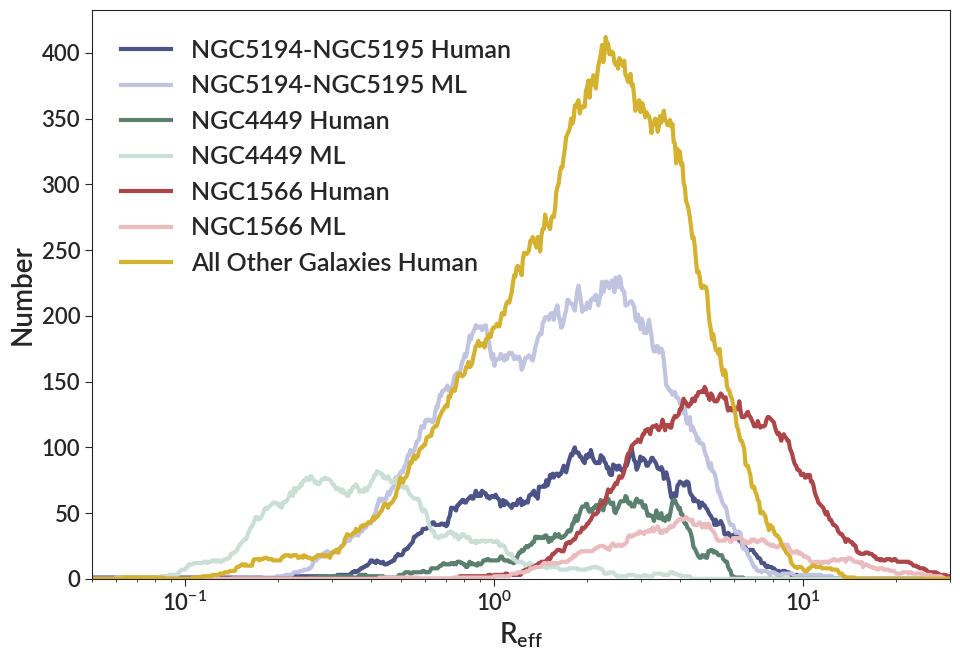

In [12]:
fig, ax = bpl.subplots()

to_separate = ["ngc5194-ngc5195-mosaic", "ngc4449", "ngc1566"]
plot_colors = {"ngc5194-ngc5195-mosaic": bpl.color_cycle[0],
               "ngc4449":bpl.color_cycle[5], "ngc1566": bpl.color_cycle[3]}

combo_cats = []
for galaxy, cat in catalogs.items():
    if galaxy not in to_separate:
        combo_cats.append(cat)
    else:
        ax.plot(*error_hist(cat["r_eff_min"][cat["from_human"]], 
                            cat["r_eff_max"][cat["from_human"]]), 
                label=f"{galaxy.upper().replace('-MOSAIC', '')} Human", 
                c=plot_colors[galaxy])
        ax.plot(*error_hist(cat["r_eff_min"][cat["from_ml"]], 
                            cat["r_eff_max"][cat["from_ml"]]), 
                label=f"{galaxy.upper().replace('-MOSAIC', '')} ML",
                c=bpl.fade_color(plot_colors[galaxy]))
        

combo_cat = table.vstack(combo_cats, join_type="inner")
ax.plot(*error_hist(combo_cat["r_eff_min"], 
                    combo_cat["r_eff_max"]), 
        label="All Other Galaxies Human", c=bpl.color_cycle[4])
        

ax.set_xscale("log")
ax.set_limits(0.05, 30, 0)
ax.legend(loc=2, frameon=False)
ax.add_labels("$R_{eff}$", "Number")
fig.savefig("human_ml_reff_split.png")

# Looking at classification matrix

Where there is overlap, see which are identified as which.

For this I have to load the original catalogs, since in mine I restricted to the good classes.

In [13]:
dc = {
    "source id": "ID",
    "x coordinates in the ref single frame (image aligned and registered, these coordinates are the same in each filter)": "x_pix_single",
    "y coordinates in the ref single frame (image aligned and registered, these coordinates are the same in each filter)": "y_pix_single",
    "x coordinates in the ref frame (image aligned and registered, these coordinates are the same in each filter)": "x_pix_single",
    "y coordinates in the ref frame (image aligned and registered, these coordinates are the same in each filter)": "y_pix_single",
    "x coordinates in the ref mosaic frame (image aligned and registered, these coordinates are the same in each filter)": "x_pix_mosaic",
    "y coordinates in the ref mosaic frame (image aligned and registered, these coordinates are the same in each filter)": "y_pix_mosaic",
    "RA coordinates in the ref single frame (image aligned and registered, these coordinates are the same in each filter). The RA and DEC are the same in mosaic and single frames": "RA",
    "DEC coordinates in the ref single frame (image aligned and registered, these coordinates are the same in each filter). The RA and DEC are the same in mosaic and single frames": "Dec",
    "RA coordinates in the ref frame (image aligned and registered, these coordinates are the same in each filter)": "RA",
    "DEC coordinates in the ref frame (image aligned and registered, these coordinates are the same in each filter)": "Dec",
    "final total mag in WFC3/F275W": "mag_F275W",
    "final total mag in WFC3/F336W": "mag_F336W",
    "final total mag in WFC3/F435W": "mag_F435W",
    "final total mag in WFC3/F438W": "mag_F438W",
    "final total mag in WFC3/F555W": "mag_F555W",
    "final total mag in WFC3/F814W": "mag_F814W",
    "final total mag in  WFC3/F336W": "mag_F336W",  # has an extra space
    "final total mag in ACS/F435W": "mag_F435W",
    "final total mag in ACS/F555W": "mag_F555W",
    "final total mag in ACS/F606W": "mag_F606W",
    "final total mag in ACS/F814W": "mag_F814W",
    "final photometric error in WFC3/F275W": "photoerr_F275W",
    "final photometric error in WFC3/F336W": "photoerr_F336W",
    "final photometric error in WFC3/F438W": "photoerr_F438W",
    "final photometric error in WFC3/F555W": "photoerr_F555W",
    "final photometric error in WFC3/F814W": "photoerr_F814W",
    "final photometric error in ACS/F435W": "photoerr_F435W",
    "final photometric error in ACS/F555W": "photoerr_F555W",
    "final photometric error in ACS/F606W": "photoerr_F606W",
    "final photometric error in ACS/F814W": "photoerr_F814W",
    "final photometric error in F275W": "photoerr_F275W",
    "final photometric error in F336W": "photoerr_F336W",
    "final photometric error in F435W": "photoerr_F435W",
    "final photometric error in F438W": "photoerr_F438W",
    "final photometric error in F555W": "photoerr_F555W",
    "final photometric error in F606W": "photoerr_F606W",
    "final photometric error in F814W": "photoerr_F814W",
    "CI=mag(1px)-mag(3px) measured in the F555W. This catalogue contains only sources with CI>=1.4.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W. This catalogue contains only sources with CI>=1.35.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W. This catalogue contains only sources with CI>=1.3.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W. This catalogue contains only sources with CI>=1.25.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W. This catalogue contains only sources with CI>=1.2.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W frame. This catalogue contains only sources with CI >= 1.3.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W frame. This catalogue contains only sources with CI >= 1.25": "CI",
    "CI=mag(1px)-mag(3px) measured in the F555W frame. This catalogue contains only sources with CI >= 1.2.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F606W. This catalogue contains only sources with CI>=1.4. If sources with smaller CI are found then they have been addeded during visual inspection": "CI",
    "CI=mag(1px)-mag(3px) measured in the F606W frame. This catalogue contains only sources with CI >= 1.3.": "CI",
    "CI=mag(1px)-mag(3px) measured in the F606W frame. This catalogue contains only sources with CI >= 1.4.": "CI",
    "best age in yr": "age_yr",
    "max age in yr (within 68 % confidence level)": "age_yr_max",
    "min age in yr (within 68 % confidence level)": "age_yr_min",
    "best mass in solar masses": "mass_msun",
    "max mass in solar masses (within 68 % confidence level)": "mass_msun_max",
    "min mass in solar masses (within 68 % confidence level)": "mass_msun_min",
    "best E(B-V)": "E(B-V)",
    "max E(B-V) (within 68 % confidence level)": "E(B-V)_max",
    "min E(B-V) (within 68 % confidence level)": "E(B-V)_min",
    "chi2 fit residual in F275W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F265W",
    "chi2 fit residual in F336W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F336W",
    "chi2 fit residual in F435W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F435W",
    "chi2 fit residual in F438W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F438W",
    "chi2 fit residual in F555W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F555W",
    "chi2 fit residual in F606W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F606W",
    "chi2 fit residual in F814W, if positive the flux observed at that wavelenght is higher then predicted by the best fitted model (and viceversa)": "chi_2_F814W",
    "reduced chi2": "chi_2_reduced",
    "Q probability is a measurement of the quality of the fit; if close to 1 fit is good, if close to 0 the fit outputs are not well constrained. See numerical recipies": "Q_probability",
    "Number of filter. Sources with UBVI or UV-BVI detection have Nflt=4; sources with detection in UV-UBVI have Nflt=5. The remining sources have Nflt=0. The SED fit has been done only on sources with Nflt>=4": "N_filters",
    "Number of filter. Sources with UBVI or UV-BVI detection have Nflt=4; sources with detection in UV-UBVI have Nflt=5. The remining sources have Nflt=0. The SED fit has been done only on sources with Nflt>=0": "N_filters",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.4 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.35 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.3 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.3 and m_606<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.2 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.4 and m_606<=-6.0  mag have been visually inspected. If sources with smaller CI are found then they have been addeded during visual inspection. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mode. Only clusters with Nflt>=4, CI>=1.25 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final assigned class of the source after visual inspection, applying the mean. The classification is the same as before (0,1,2,3,4). A strong deviation between Class_mode and Class_mean for the same source shows uncertainty in the visual classification.": "class_mean_human",
    "Final morphological flag. The classification contained in this column is the one that should be used to perform the cluster analysis. It has been derived in a hybrid way. A fraction has been visually inspected by 3 humans, a fraction only by ML, a fraction by one humans which has revised the ML classification. The flag in column 35 will provide the source of the classification. Only clusters with Nflt>=4, CI>=1.35 and m_555<=-6.0  mag have been morphologically classified. Please, notice that the aperture correction applied to the V band before the magnitude cut is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned here a morphological flag which corresponds to class=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_hybrid",
    "Method of visual inspection. Flag 0, the source has been classified only by the ML approach; flag 1 is for sources which have been classified by the ML and then verified by 1 human; flag 3 is for sources which have been visually classified both by 3 humans and by the ML; flag 4 the sources have been first classified by 3 humans, then by the ML, and again verified by 1 human. If a source has flag 3 or 4 the human classification listed in column 36 has been preferred to the ones given in column 37 and 38. If a source has flag 1 then the classification given in column 38 has been preferred above the ML one. If a source has flag 0 then only ML classification is available and can be used. A flag 6 indicates a post-reclassification of sources that had originally assigned class 4. These sources have been selected to satisfy the following conditions CI <= 1.8, V-I <= 1.8 mag and  23.28 > V > 18.0 mag. At difference of the classification in column 39 we add here an extra requirement on the luminosity being brighter than -8 mag (i.e. V<23.28 mag)": "class_hybrid_method",
    "Final morphological class of the source after visual inspection of 3 humans (mode value). The classification is the same as before (0,1,2,3,4).": "class_mode_human",
    "Final assigned class of the source after visual inspection of 3 humans (mode value). Only clusters with Nflt>=4, CI>=1.35 and m_555<=-6.0  mag have been visually inspected. Please, notice that the aperture correction applied to the V band before the magnitude cut is applied is dependent of the CI measured in this filter. Those sources which did not pass the cut have assigned a flag=0. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts).": "class_mode_human",
    "Final morphological class of the source using the machine learning (ML) approach. The classification is the same as before (0,1,2,3,4).": "class_ml",
    "Final assigned class of the source using the machine learning (ML) approach. The classification is the same as before (0,1,2,3,4).": "class_ml",
    "Final assigned class of the source using the machine learning (ML) approach. The classification is as following. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts). Class=0 class not assigned.": "class_ml",
    "Final morphological classification assigned by 1 human who has verified the ML classification. The classification is the same as before (0,1,2,3,4).": "class_human_verify_ml",
    "Final morphological post-reclassification by 1 human of sources that had originally assigned class 4. These sources have been selected to satisfy the following conditions CI <= 1.8, V-I <= 1.8 mag and V > 18.0 mag.": "class_reclassify_4_human",
    'Visual classification done by LEGUS team-member Sean Linden and Brad Whitmore. A grid search of the entire image is made but with candidate clusters with Nflt>=4, CI>=1.3 and m_555<=-6.0 OVERLAYED and evaluated at the same time. Positions of clearly missing clusters (i.e., classes 1 and 2, but not 3) are measured using the imexamine task in IRAF and photometry on these positions are done in using the last step of the LEGUS pipeline legus_clusters_extraction.py. Please notice that the magnitude cut V<=-6 mag is not applicable to the added “missing" clusters which can be potentially fainter, especially in the outer regions where it is easier to pick up faint clusters. The classification follows the standard LEGUS flagging system. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts). Class=0 sources not inspected.': "class_linden_whitmore",
    'Visual classification done by LEGUS team-member Sean Linden and Brad Whitmore. A grid search of the entire image is made but with candidate clusters with Nflt>=4, CI>=1.4 and m_606<=-6.0 OVERLAYED and evaluated at the same time. Positions of clearly missing clusters (i.e., classes 1 and 2, but not 3) are measured using the imexamine task in IRAF and photometry on these positions are done in using the last step of the LEGUS pipeline legus_clusters_extraction.py. Please notice that the magnitude cut V<=-6 mag is not applicable to the added “missing" clusters which can be potentially fainter, especially in the outer regions where it is easier to pick up faint clusters. The classification follows the standard LEGUS flagging system. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts). Class=0 sources not inspected.': "class_linden_whitmore",
    'Visual classification done by LEGUS team-member Brad Whitmore. A grid search of the entire image is made but with candidate clusters with Nflt>=4, CI>=1.3 and m_555<=-6.0 OVERLAYED and evaluated at the same time. Positions of clearly missing clusters (i.e., classes 1 and 2, but not 3) are measured using the imexamine task in IRAF and photometry on these positions are done in using the last step of the LEGUS pipeline legus_clusters_extraction.py. Please notice that the magnitude cut V<=-6 mag is not applicable to the added “missing" clusters which can be potentially fainter, especially in the outer regions where it is easier to pick up faint clusters. The classification follows the standard LEGUS flagging system. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts). Class=0 sources not inspected.': "class_whitmore",
    'Visual classification done by LEGUS team-member Brad Whitmore. A grid search of the entire image is made but with candidate clusters with Nflt>=4, CI>=1.2 and m_555<=-6.0 OVERLAYED and evaluated at the same time. Positions of clearly missing clusters (i.e., classes 1 and 2, but not 3) are measured using the imexamine task in IRAF and photometry on these positions are done in using the last step of the LEGUS pipeline legus_clusters_extraction.py. Please notice that the magnitude cut V<=-6 mag is not applicable to the added “missing" clusters which can be potentially fainter, especially in the outer regions where it is easier to pick up faint clusters. The classification follows the standard LEGUS flagging system. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4, spurious detection (foreground/background sources, single bright stars, artifacts). Class=0 sources not inspected.': "class_whitmore",
    'Visual classification done by Brad Whitmore. A grid search of the entire image is made but with candidate clusters with Nflt>=4, CI>=1.3 and m_555<=-6.0 (i.e., cat_UBVI_avgapcor_magcut_ci1.3_ngc4449_merge.coo) OVERLAYED and evaluated at the same time. Positions of clearly missing clusters (i.e., classes 1 and 2, but not 3) are measured using the imexamine task in IRAF and photometry on these positions are done in using the last step of the LEGUS pipeline legus_clusters_extraction.py. Please notice that the magnitude cut V<=-6 mag is not applicable to the added “missing" clusters which can be potentially fainter, especially in the outer regions where it is easier to pick up faint clusters. The classification follows the standard LEGUS flagging system. Class=1, symmetric, compact cluster.  Class=2, concentrated object with some degree of asymmetry, possible color gradient.  Class=3, multiple peak system, diffuse, could be spurious nearby stars along the line of sight.  Class=4 or 0, spurious detection (foreground/background sources, single bright stars, artifacts). Class=5 sources not inspected.': "class_whitmore",
    "Quality flag included by Sean Linden and Brad Whitmore. 1 = certain, 2 = likely, 3 = possible": "quality_linden_whitmore",
    "Quality flag included by Brad Whitmore. 1 = certain, 2 = likely, 3 = possible": "quality_whitmore",
    "Halpha morphology at the position of the source by Sean Linden and Brad Whitmore. 1 = Halpha right on top, 2 = ring or clearly associated, 3 = possibly associated, 4 = no H alpha": "halpha_flag_linden_whitmore",
    "Halpha morphology at the position of the source by Brad Whitmore. 1 = Halpha right on top, 2 = ring or clearly associated, 3 = possibly associated, 4 = no H alpha": "halpha_flag_whitmore",
    "Flag indicates how the source has been selected, 0 is by the LEGUS pipeline, 1 by visual inspections of the frames.": "selection_flag",
    "Flag indicates how the source has been detected, 0 is by the LEGUS pipeline, 1 by visual inspections of the frames by Sean Linden and Brad Whitmore": "selection_flag",
    "Flag indicates how the source has been detected, 0 is by the LEGUS pipeline, 1 by visual inspections of the frames by Brad Whitmore": "selection_flag",
    "Flag indicates how the source has been selected, 0 is by the LEGUS pipeline, 1 by visual inspections of the frames by Dave Cook, 2 by visual inspections of the frames by Brad Whitmore.": "selection_flag",
}

In [14]:
def header_line_to_colnames(header_line):
    """
    Turn a line from the header into the old and new column names

    :param header_line: A line from the header file with info about a column. This
                        is assumed to be of the form `number. description`
    :return: A two item tuple containing the old column name and new column name
    :rtype: tuple
    """
    position = header_line.split(".")[0]
    description = ".".join(header_line.split(".")[1:]).strip()

    old_col = f"col{position}"
    new_col = dc[description]

    return old_col, new_col

def find_catalogs(home_dir):
    """
    Find the name of the base catalog name. We need a function for this because we
    don't know whether it has ACS and WFC3 in the filename of just one.

    :param home_dir: Directory to search for catalogs
    :type home_dir: Path
    :return: Path objects pointing to the catalog and readme file.
    :rtype: tuple
    """
    galaxy_name = home_dir.name
    for item in home_dir.iterdir():
        if not item.is_file():
            continue
        filename = item.name
        # see if it starts and ends with what the catalog should be. We don't know what
        # instruments make up the catalog data, so we leave that segment of the name out
        if filename.startswith("hlsp_legus_hst_") and filename.endswith(
            f"{galaxy_name}_multiband_v1_padagb-mwext-avgapcor.tab"
        ):
            catalog = item
            header = Path(str(item).replace(".tab", ".readme"))
            return catalog, header
    # if we got here, we have an error.
    raise FileNotFoundError(f"No catalog found in {home_dir}")
    
def format_catalogs(galaxy):
    catalog_name, header_name = find_catalogs(data_home / galaxy)
    # Then we can do what we need. First we'll go through the header to get the lists of
    # all the old and new colnames
    old_colnames = []
    new_colnames = []
    with open(header_name, "r") as header:
        for line in header:
            line = line.strip()

            if line.startswith("#") or len(line) == 0:
                continue
            # otherwise, see if this is a line containing info. We'll pick lines with
            # a first item that is an integer followed by a period
            first_item = line.split()[0]
            if not first_item[-1] == ".":
                continue
            try:
                int(first_item[:-1])
            except ValueError:  # unsucccessful type conversion, not an integer
                continue  # go to next line

            # if we are here we have an integer followed by a period, so we have the
            # desired line
            old_col, new_col = header_line_to_colnames(line)

            old_colnames.append(old_col)
            new_colnames.append(new_col)

    # Then we can use these column names to replace the ones given originally
    catalog = table.Table.read(catalog_name, format="ascii")
    catalog.rename_columns(old_colnames, new_colnames)
    return catalog

In [15]:
ngc4449_original = format_catalogs("ngc4449")
ngc5194_original = format_catalogs("ngc5194-ngc5195-mosaic")
ngc1566_original = format_catalogs("ngc1566")

In [16]:
def make_matrix(ml_classification, human_classification):
#     print(np.max(human_classification), np.max(ml_classification))
    h_max = int(np.max(human_classification))
    m_max = int(np.max(ml_classification))
    raw_matrix = np.zeros((h_max, m_max))
    for idx in range(len(ml_classification)):
        h = int(human_classification[idx])
        m = int(ml_classification[idx])
        raw_matrix[h-1][m-1] += 1
    return raw_matrix

In [17]:
matrix_4449 = make_matrix(ngc4449_original["class_ml"], ngc4449_original["class_whitmore"])
matrix_5194 = make_matrix(ngc5194_original["class_ml"], ngc5194_original["class_mode_human"])
matrix_1566 = make_matrix(ngc1566_original["class_ml"], ngc1566_original["class_mode_human"])

In [18]:
def visualize_matrix(matrix):
    norm = colors.LogNorm(vmin=1, vmax=10**np.ceil(np.log10(np.max(matrix))))
    cmap = bpl.cm.davos

    x_shape = matrix.shape[0]
    y_shape = matrix.shape[1]
    fig, ax = bpl.subplots()
    im = ax.imshow(matrix.T, norm=norm, cmap=cmap, origin="lower",
                   extent=(0.5, 0.5+x_shape, 0.5, 0.5+y_shape))
    cb = fig.colorbar(im, ax=ax)
    
    for x_idx in range(x_shape):
        for y_idx in range(y_shape):
            ax.add_text(x_idx + 1, y_idx + 1, int(matrix[x_idx][y_idx]),
                        fontsize=12, ha="center", va="center")
    
    cb.set_label("Number of Clusters")
    ax.add_labels("Human Classification", "ML Classification")

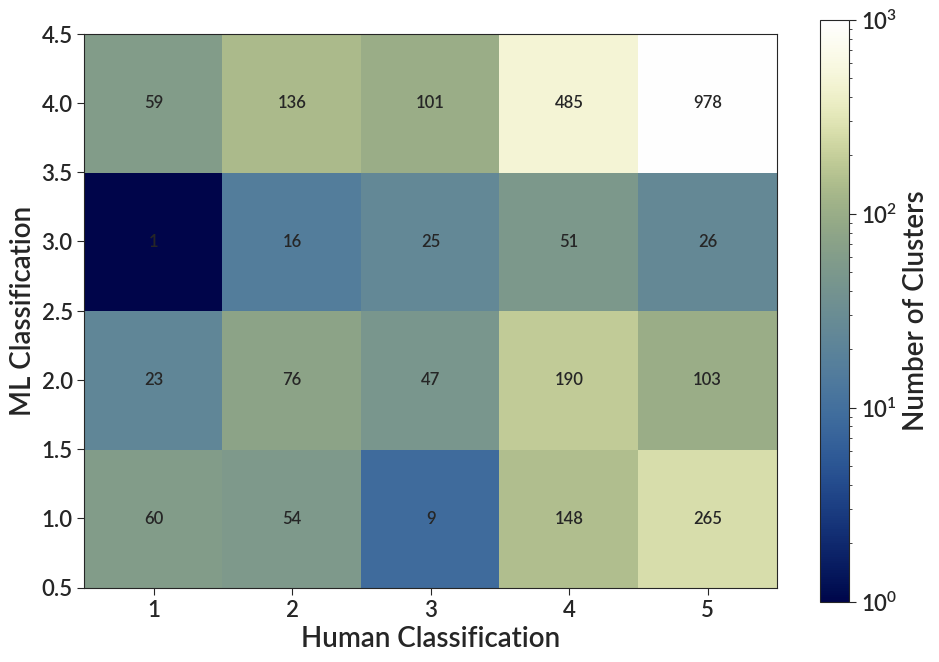

In [19]:
visualize_matrix(matrix_4449)

Lots of human 4s that are ML 1s and 2s. This is a bad sign.

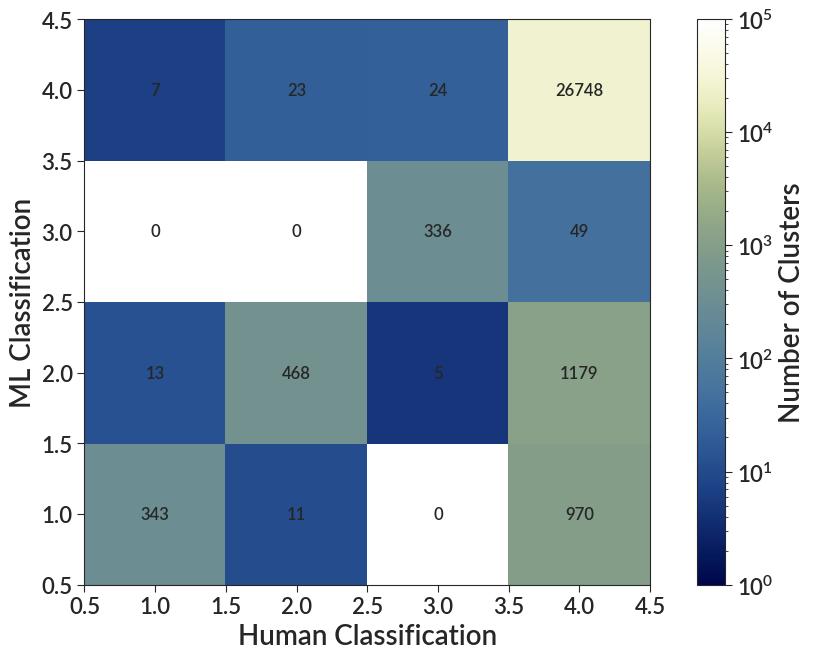

In [20]:
visualize_matrix(matrix_5194)

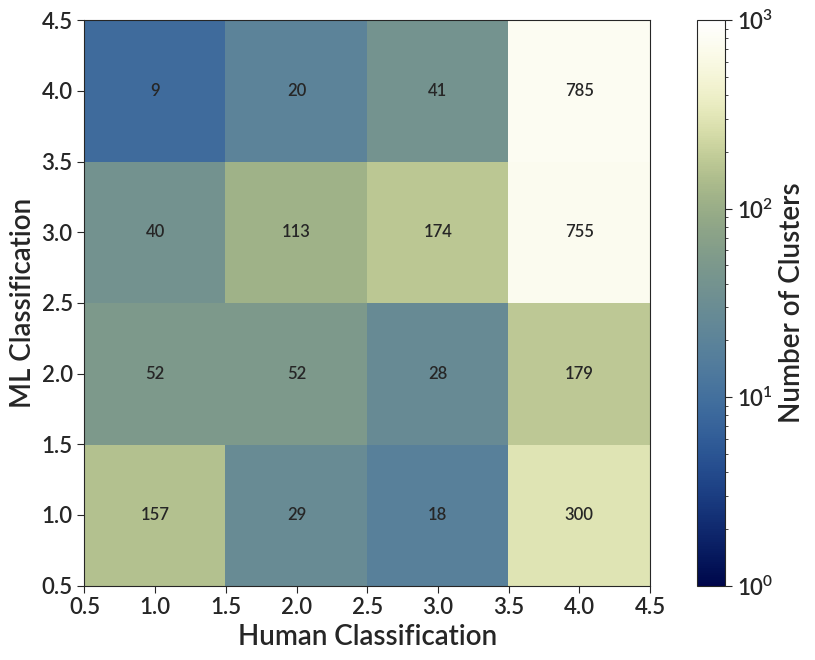

In [21]:
visualize_matrix(matrix_1566)

# Punchline
NGC1566 is double checked by humans, so it is reliable. The ML is trained on NGC 5194, so it is reliable too. But NGC4449 is not reliable. This is seen both in the cluster properties and the training matrix here.